# 5 Likelihood

<div class="alert alert-block alert-warning">
<b> Intended learning objectives:</b> 
    
By the end of this session you should be able to:  
* explain the concepts of likelihood and maximum likelihood estimation 
* derive a likelihood in a simple situation 
* explain the connection between maximising the likelihood and maximising the log-likelihood 
* describe and apply the process of obtaining a maximum likelihood estimator
    
</div>


## 5.1 Probability versus Inference

A typical probability problem is as follows. We are planning to run a small clinical study, which involves giving 8 patients a particular drug. We are told that the probability that a single patient experiences a side effect from a particular drug is 0.23. From this information, we can calculate the probability of various complex events occurring. For example, we might want to know the probability that more than 6 of the 8 patients will experience a side effect. Or we might wish to know the probability that none of the 8 patients experience a side effect. Here, we are assuming that a characteristic (parameter) of the population is known. Specifically, we are assuming that we know the true probability of a single patient experiencing a side effect.

Real life is not like that! Typically, in health data science studies, we have observed some data which we believe can be modelled using a particular distribution, but the parameters of that distribution are unknown. For the small clinical study, for example, in real life we would observe how many of the 8 patients did in fact experience a side effect. We might be happy to assume that these data are drawn from a binomial distribution. But the probability of a patient experiencing a side effect - the key parameter of the binomial distribution - would be unknown. The study aim would be to make statements - inferences - about that unknown parameter. So, in some sense, the problem is the opposite way around.

Our task, in statistical inference, is to make statements about the underlying parameter(s) of our proposed model given the observed data. In particular, we typically wish to obtain the best estimate of the unknown parameters. In the simple clinical study, we would want to obtain the best estimate of the unknown probability of experiencing a side effect, given the observed information about how many of the 8 patients did experience a side effect. We also wish to know how well we have estimated the unknown parameter(s): what is the uncertainty associated with our estimate(s)?

The concept of likelihood provides the best single framework for this task. We will see that the likelihood function, often simply called the likelihood, plays a fundamental role in both frequentist and Bayesian inference.


## 5.2 Maximum likelihood estimation

Consider the example above, of a small clinical study of 8 patients who are all given a particular drug. The observed data consist of the number, of those 8 patients, who experience a side effect. Suppose that we conduct the study and observe that 2 patients experience a side effect. We wish to use these observed data to make statements - inferences - about the unknown probability of experiencing a side effect from that drug.

**Statistical model:** We begin by defining a model for the data. Here, we define $X$ as the random variable representing the total number of the 8 patients who experience a side effect. Our model is that

$$
X \sim binomial(8, \pi)
$$

which - we remember from the probability sessions - involves the assumptions that each Bernoulli event (whether or not each individual patient experiences a side effect) is independent and has the same probability of occurring.

This model involves the unknown parameter $\pi$.

**Data:** We have observed a realisation from this model, $X=2$. These are often called our observed data.

Under our proposed statistical model, the probability that 2 out of 8 patients experience a side effect is:

$$
P(X=2) = {8 \choose 2} \pi^2 (1-\pi)^6
$$

Since $\pi$ is unknown, it is natural to consider how the probability of observing these data varies with different values of $\pi$:

| $\pi$ |P($X$=$2$)|
|:-----:|:--------:|
| 0     | 0        |
| 0.25  | 0.311    |
| 0.5   | 0.109    |
| 0.75  | 0.004    |
| 1     | 0        |

Suppose that, in truth, the unknown probability of a patient experiencing a side effect from this drug was 0.75. The probability of then observing 2 from 8 patients experiencing a side effect is 0.004. This is a very low probability, so this would be an unusual or perhaps unexpected event, although not strictly impossible.

Suppose that, conversely, the unknown probability of a patient experiencing a side effect from this drug was actually 0.25. Then the probability of observing 2 from 8 patients experiencing a side effect would be 0.31 ($31\%$). If this were the case, there would be nothing unusual or unexpected about our observed data.

We do not know which value of $\pi$ is the true value. But a sensible strategy to obtain a 'best guess', or estimate, of $\pi$, might be to pick the value which maximises the probability of observing the data that we observed. We will see below that this probability is in fact the likelihood, leading to the concept of maximising the likelihood or maximum likelihood. This is a term that you will encounter frequently in statistics.

Following these ideas, we can extend the table above by considering a finer range of possible values for $\pi$ between 0 and 1, and plot the probability of observing $X=2$, assuming that that value of $\pi$ were true. This gives the graph below.


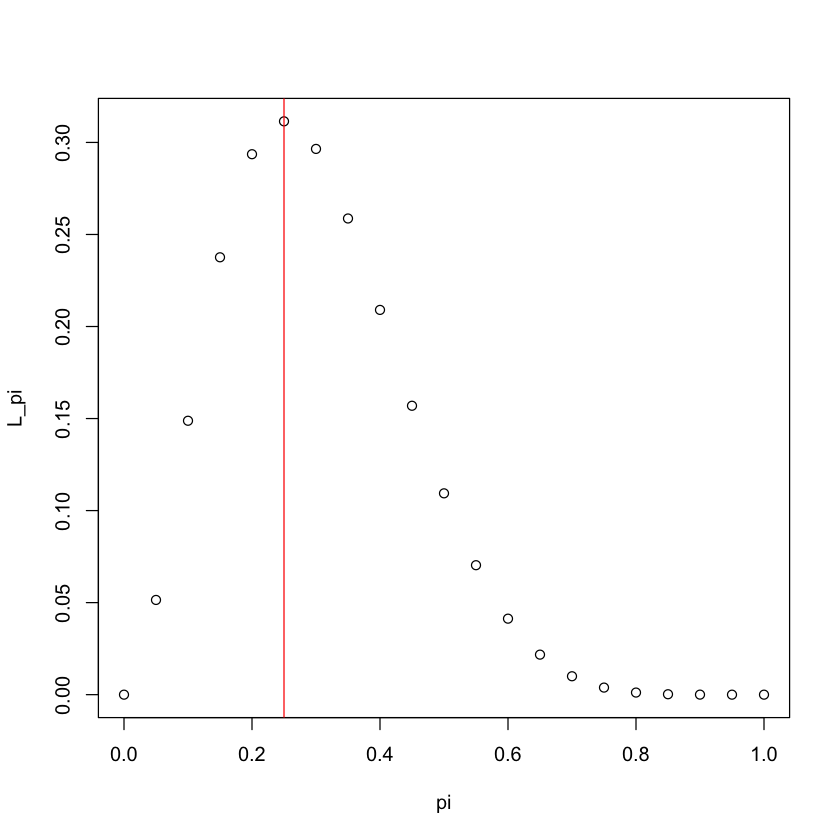

In [1]:
# Define a range of values for pi
pi = seq(0,1,by = 0.05)

# Calculate the likelihood for each value, given n=8 and x=2
L_pi <- choose(8,2)*pi^2*(1-pi)^(8-2)

# Plot the output
plot(x = pi, y = L_pi)

# Add a line to indicate the value which yields the highest likelihood
abline(v = pi[which.max(L_pi)], col = "red")

We see that $\pi=0.25$ is the value that leads to the highest probability of observing the data that we did indeed observe (i.e $X=2$) so we choose this value as our best guess for $\pi$. We will see that this value is called the maximum likelihood estimator. We write $\hat{\pi} = 0.25$, where we have added a hat to indicate that this is being viewed as an estimate of an unknown parameter.

The likelihood when $\pi = 0$ is exactly zero, as is the likelihood when $\pi = 1$. This makes sense because these two probabilities would make the observed data impossible - they imply that patients would either *never* or *always* experience side effects. Informally, we could say that these values are *inconsistent* with the data. 

Note that, our estimate of the probability of a patient experiencing a side effect is intuitively a sensible one: it is the sample proportion, $\frac{2}{8}$.

We will see later on that estimators obtained in this way (by maximising a likelihood) have very nice statistical properties.


## 5.3 The likelihood

The function that we maximised above to find our estimate for the unknown parameter $\pi$ took the same algebraic appearance as the probability distribution function, evaluated at the value of the observed data. We will see below that this function is called the likelihood. The likelihood looks like a probability distribution function. It has a probabilistic interpretation for any particular value of $\pi$: it's the probability of seeing the observed data assuming that is the true value of $\pi$. However, in contrast to the probability distribution function, which is a function of $x$ and sums to 1 over all possible values of $x$, the likelihood function is a function of $\pi$. So, for example, this does not sum to 1 over all possible values of $\pi$. 

A general definition of the likelihood is as follows.

For a probability model with parameter $\theta$, the likelihood of the parameter $\theta$ given the observed data $x$ is defined as

$$
L(\theta | x) = P(x | \theta)
$$

On the right hand side of this equation:

* This is either a probability distribution function or a density function
* If our distribution is discrete, as above, this is: $P(x | \theta) = P(X=x)$
* If our distribution is continuous, this becomes: $P(x | \theta) = f(x)$
* $P(x | \theta)$ is a probability statement. It is the probability of seeing the observed data, under the assumed model, assuming that the true parameter value is equal to $\theta$.

And on the left hand side of this equation:

* $L(\theta | x)$ is the likelihood function, often just called the likelihood. 

In an informal sense the likelihood conveys the *consistency* of different values of the parameter with the observed data.

We often just write the likelihood as $L(\theta)$. The additional notation (writing "$| x$") is merely to remind ourselves that the likelihood function involves the observed data, but it is not a function of these: $x$ is treated as a fixed quantity in the likelihood. 


## 5.4 Examples of likelihoods¶

### 5.4.1 Binomial model

Consider a diabetes clinic at which patients present following initial diagnosis. The first line of intervention for diabetes is lifestyle change, and the clinician wants to determine what proportion of patients will respond to this intervention. She decides to conduct a study by following up twenty patients who present to the clinic in one day. 

**Statistical model:** We assume that a binomial model is appropriate for the number of patients who will respond to lifestyle changes out of the twenty patients in total.

$$ X \sim Bin(20, \pi) $$

**Data:** Out of the twenty patients sampled, she found that twelve of them had responded well after six weeks of recommended lifestyle changes. Our observed data are $x = 12$.

**Probability mass function:** As we described before, the likelihood of $\pi$ given these data is the probability of observing the data for different values for $\pi$. Remember the PMF for a binomial distribution of size 20,

$$ P(X = x|\pi) = {20 \choose x} \pi^{x} (1-\pi)^{20 - x} $$

for a given value of $\pi$. 

**Likelihood:** The likelihood has this same form but is viewed as a function of $\pi$, rather than a function of $x$. For our observed data of 12 out of 20 patients,

$$ L(\pi | x = 12) = {20 \choose 12} \pi^{20} (1-\pi)^{20 - 12} \\  $$

As before, we can identify the value of $\pi$ which gives the maximum likelihood by plotting the likelihood for a range of values of $\pi$.

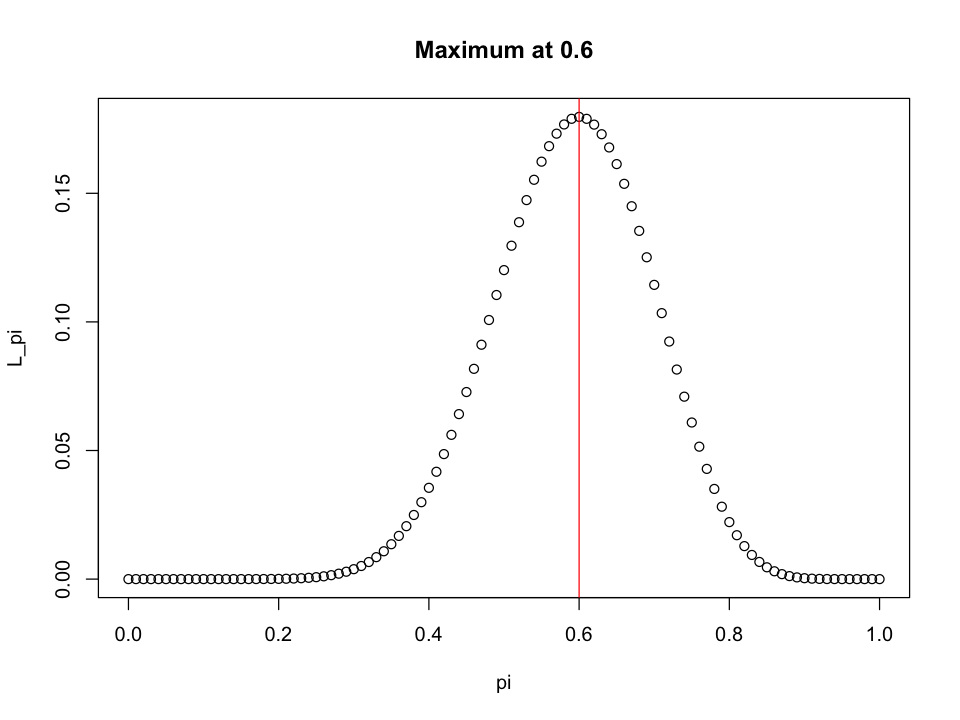

In [2]:
options(repr.plot.width=8, repr.plot.height=6)

# Define a range of values for pi
pi = seq(0,1,by = 0.01)

# Calculate the likelihood for each value, this time given n=20 and x=12
L_pi <- choose(20,12)*pi^12*(1-pi)^(20-12)

# Plot the output
plot(x = pi, y = L_pi)

# Find the value of pi for which L_pi is highest
pi_max <- pi[which.max(L_pi)]

# Add a line to the plot at pi_max
abline(v = pi_max, col = "red")

# Add a title specifying the value of pi_max
title(paste("Maximum at", pi_max))

The value which maximises this function is 0.6, the observed sample proportion; we'll call this value $\hat{\pi}$ to indicate that it is an estimate of $\pi$. Notice that the likelihood for values of $\pi$ smaller than 0.3 or greater than 0.9 is very small - much smaller than that of values around 0.6 - suggesting that these values are inconsistent with the observed data.  

### 5.4.2 Exponential model

Suppose we wish to estimate how long patients usually wait in reception before their GP appointment. At one practice, a patient walks through the door and the receptionist records the time until they get called through.

**Statistical model:** The waiting time in minutes, $Y$, is a continuous random variable which must be non-negative. It is common to use an exponential distribution to model waiting times, so we will assume it's a reasonable choice for this example.

$$ Y \sim Exp(\lambda) $$

*Remember that the mean of this distribution is equal to one over the rate parameter $\lambda$, i.e. $E(Y) = \frac{1}{\lambda}$.*

**Data:** The receptionist observes that the patient waits for eight minutes and forty-five seconds, so $y = 8.75$.

**Probability density function:** The PDF for an exponential distribution is

$$f_Y(y|\lambda) = \lambda e^{-y\lambda}$$

**Likelihood:** We write down the likelihood for $\lambda$ based on the exponential PDF above.

$$ L(\lambda | y = 8.75) = \lambda e^{-8.75\lambda}$$


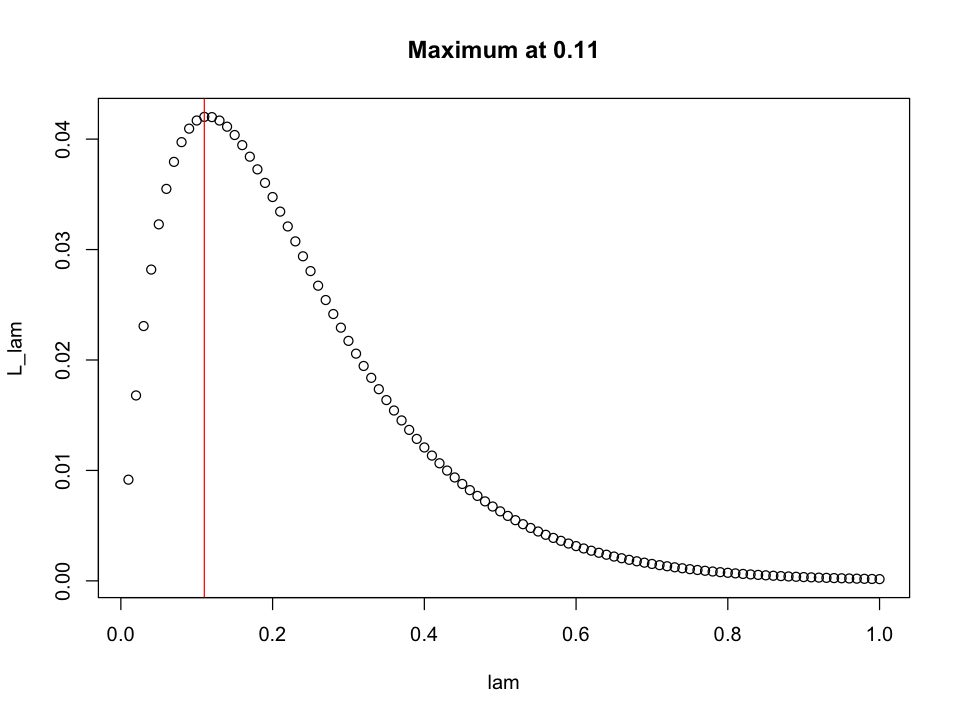

In [3]:
options(repr.plot.width=8, repr.plot.height=6)

# Define a range of values for lambda, equating to mean waiting times from 1 to 100 minutes
lam = seq(0.01,1,by = 0.01)

# Calculate the likelihood for each value, given y=8.75
L_lam <- lam*exp(-8.75*lam)

# Find the value of lambda for which L_lam is highest
lam_max <- lam[which.max(L_lam)]

# Plot the likelihood and indicate the maximum value
plot(x = lam, y = L_lam)
abline(v = lam_max, col = "red")
title(paste("Maximum at", round(lam_max,2)))

If we evaluate over a fine enough range of values for $\lambda$, we find that the value which maximises this exponential likelihood is equal to $\frac{1}{8.75}$, i.e. one over the observed waiting time. This defines an exponential distribution with mean equal to the observed waiting time. 

As with the binomial example, the estimate obtained by maximising the likelihood is intuitively sensible based on the data we've observed.

## 5.5 Log likelihood

We have discussed the idea that finding the maximum value of a likelihood gives us sensible estimates for the unknown parameters. For the examples above it is relatively clear from calculating a few values of the likelihood where the maximum lies, but this will not always be the case. 

A theoretical result which will come in handy is that a value which maximises the likelihood also maximises the log-transform of the likelihood, or the *log-likelihood*. This is because the log is a *concave* function, so when we use it to transform the likelihood, any maximum or minimum stays in the same place on the x-axis. We will denote the log-likelihood $l(\theta) = \log(L(\theta))$.

This result is evident when plotting the transformation of the two likelihoods above. 

For the binomial example:

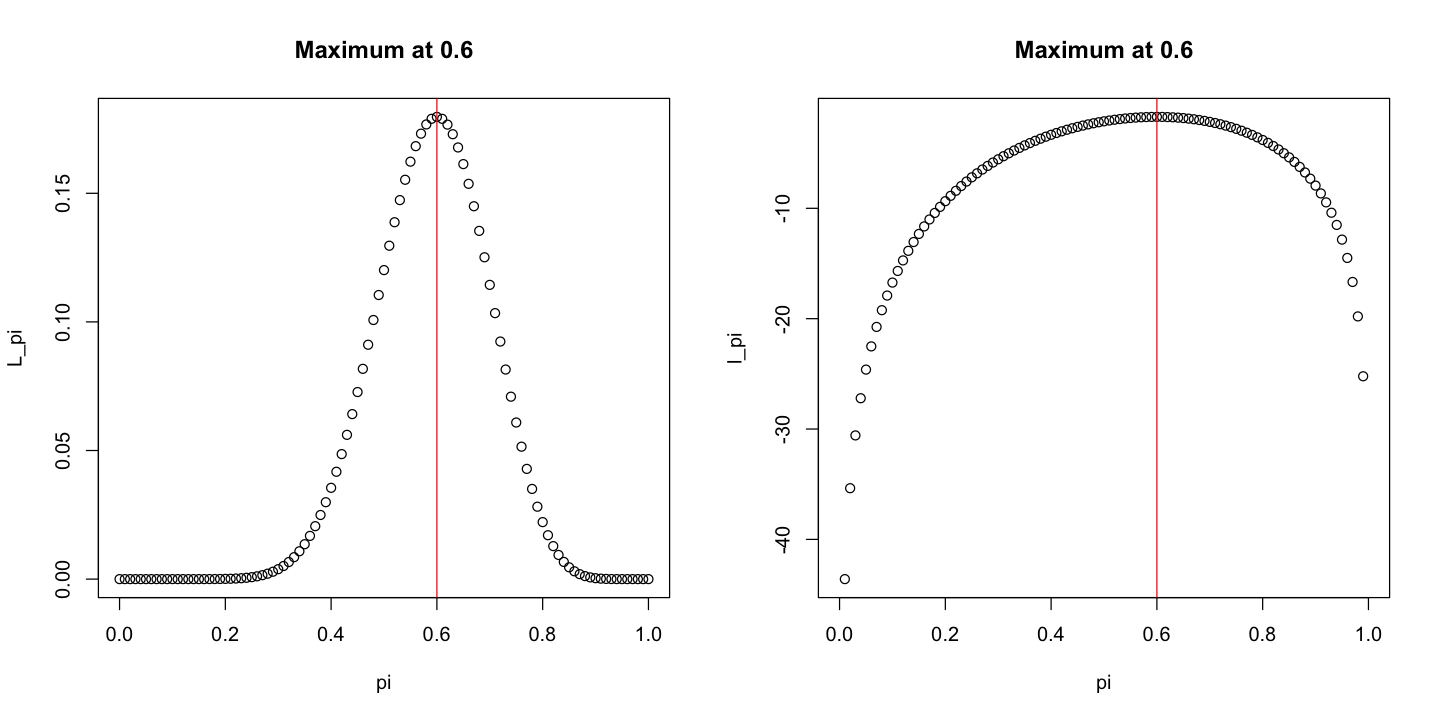

In [4]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow = c(1,2))

# likelihood L(pi)
plot(x = pi, y = L_pi)
abline(v = pi_max, col = "red")
title(paste("Maximum at", pi_max))

# log-likelihood l(pi)
l_pi <- log(L_pi)
plot(x = pi, y = l_pi)
abline(v = pi[which.max(l_pi)], col = "red")
title(paste("Maximum at", pi[which.max(l_pi)]))

For the exponential example:

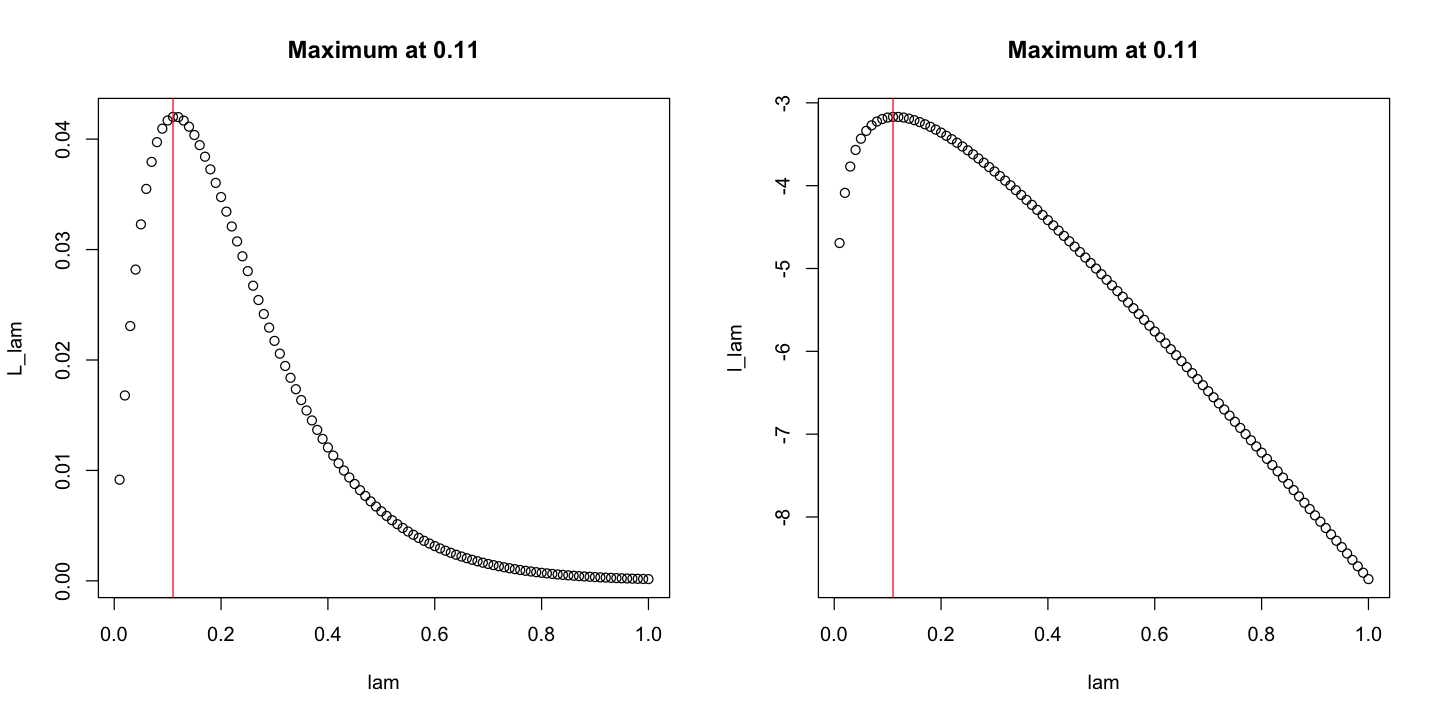

In [5]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow = c(1,2))

# likelihood L(beta)
plot(x = lam, y = L_lam)
abline(v = lam_max, col = "red")
title(paste("Maximum at", round(lam_max,2)))

# log-likelihood l(beta)
l_lam <- log(L_lam)

plot(x = lam, y = l_lam)
abline(v = lam[which.max(l_lam)], col = "red")
title(paste("Maximum at", round(lam[which.max(l_lam)],2)))

Log-transformed likelihoods are generally "better-behaved" and easier to work with than the original form. Remember the rules of logs for products and powers - we'll see in the next section how these make computation with the log-likelihood very convenient.

## 5.6 Finding the MLE

We've so far obtained the maximum likelihood estimate (MLE) by plotting the likelihood for different parameter values and looking for that which yields the maximum. Of course, the estimate obtained in this way depends on how many parameter values we evaluate. 

The more formal way is to determine the location of that maximal point algebraically, from the likelihood function itself. In this way, we can directly obtain the general form for the MLE in terms of the data.  

This is where the log-likelihood comes into its own; we know that a value which maximises the log-likelihood also maximises the likelihood, and the impact of logs on products and powers make the algebra much simpler.

We find the maximum likelihood estimator of a parameter from the log-likelihood function through the following steps:

<div class="alert alert-success">
    
<b> Method for finding MLEs:</b>   
1.  Obtain the derivative of the log-likelihood: $\frac{d l(\theta \mid {x})}{d \theta}$  
2.  Set $\frac{d l(\theta \mid {x})}{d \theta}=0$ and solve for $\theta$   
3.  Verify that it is a maximum by showing that the second derivative $\frac{d ^2 l(\theta \mid  {x})}{d \theta ^2 }$ is negative when the MLE is substituted for $\theta$.    
    
</div>

### 5.6.1 Binomial model

We will derive the MLE for the binomial example described earlier. In general, the likelihood given observed data of $x$ responders out of $n$ patients is 

$$ L(\pi|x) = {n \choose x} \pi^{x} (1-\pi)^{n - x} \\  $$

and so the log-likelihood is 

$$ l(\pi|x) = \log\left({n \choose x} \pi^{x} (1-\pi)^{n - x}\right) \\ = \log {n \choose x} + x \log \pi + (n-x)\log (1-\pi) $$

We can now obtain the maximum likelihood estimate from this function. 

**Step 1**: Differentiate the log-likelihood with respect to our parameter $\pi$

\begin{equation}
\frac{d l \left( \pi \mid x \right)}{d \pi} =  \frac{x}{\pi}  -\frac{(n-x)}{(1-\pi)}
\end{equation}

**Step 2**: We set the derivative equal to zero and solve for $\pi$

\begin{equation}
0 =  \frac{x}{\pi}  -\frac{(n-x)}{(1-\pi)}
\end{equation}

\begin{equation}
\frac{(n-x)}{(1-\pi)} =  \frac{x}{\pi}  
\end{equation}

\begin{equation}
(n-x)\pi =  x(1-\pi)
\end{equation}

\begin{equation}
n\pi-x\pi =  x-x\pi
\end{equation}

\begin{equation}
\hat{\pi} =  \frac{x}{n}
\end{equation}

Having solved the equation, we get that the maximum likelihood estimator for $\pi$ is $\hat{\pi} =  \frac{x}{n}$ (note that we put a hat to indicate that it is an estimator). 

There is one thing left for us to check: we have found that $\frac{x}{n}$ is the point where the derivative of the log-likelihood is zero, but that could mean that it is a maximum or a minimum of the log-likelihood function. To verify that this is indeed a maximum, we need to compute the second derivative of the log-likelihood and check that it takes a negative value when ${\pi} =  \frac{x}{n}$. 

**Step 3**: Find the second derivative:

\begin{equation}
\frac{d l^2 \left( \pi \mid x \right)}{d \pi ^2} =  -\frac{x}{\pi^2}  -\frac{(n-x)}{(1-\pi)^2}
\end{equation}

This second derivative must be negative if we plug in $\frac{x}{n}$ for ${\pi}$. Both fractions on the right hand side have a squared number in the denominator which is positive, so we only have to think about the numerators. We have that $-x \leq 0 $ since $x \geq 0$ and also $-(n-x) \leq 0 $ since $n \geq x \geq 0$. Thus the MLE for $\pi$ is $\frac{x}{n}$. 


### 5.6.2 Exponential model

The likelihood function for the exponential example is

$$L(\lambda | y) = \lambda e^{-\lambda y}$$

therefore we have

$$ l(\lambda | y) = \log \left( \lambda e^{-\lambda y} \right) = \log \lambda - y \lambda $$

**Step 1**: Differentiate the log-likelihood with respect to our parameter $\lambda$

$$\frac{d l \left( \lambda \mid y \right)}{d \lambda} = \frac{1}{\lambda} - y$$

**Step 2**: Set the derivative to zero and solve for $\lambda$

$$ \frac{1}{\lambda} - y = 0$$

$$ \hat{\lambda} = \frac{1}{y} $$


**Step 3**: Verify that this is a maximum rather than a minimum by considering the second derivative

$$ \frac{d l^2 \left(\lambda \mid y \right)}{d \lambda ^2} = -\frac{1}{\lambda^2}$$

This is negative for any value of $\lambda$. So the MLE for $\lambda$ is $\hat{\lambda} = \frac{1}{y}$, one over the observed waiting time. 


## 5.7 Summary

Likelihood is a fundamental concept in statistical inference. In this lecture we have introduced the definition of likelihood and demonstrated how it can be used to estimate an unknown parameter, through maximum likelihood estimation. For two examples, we have seen that estimates obtained by MLE are intuitively sensible for the parameter of interest and have derived them algebraically via the log-likelihood.

In the next lecture, we will find out about the specific mathematical properties which make the MLE a "good" estimator, and extend to the situation where our data consist of more than one observation.  
